In [45]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [46]:
df=pd.read_csv("Churn_Modelling.csv")

In [47]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [48]:
df.shape

(10000, 14)

In [49]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [51]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [52]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [53]:
#We need to drop unnecessaty field
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [54]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [55]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [56]:
df.duplicated().sum()

0

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

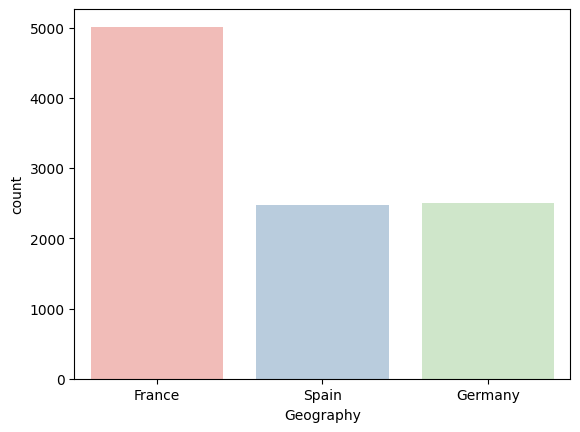

In [58]:
sns.countplot(x=df['Geography'],palette="Pastel1")
plt.show()

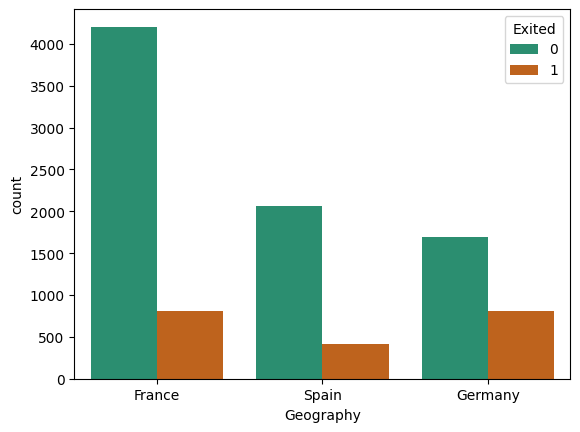

In [59]:
sns.countplot(x=df['Geography'],hue=df['Exited'],palette="Dark2")
plt.show()

In [60]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

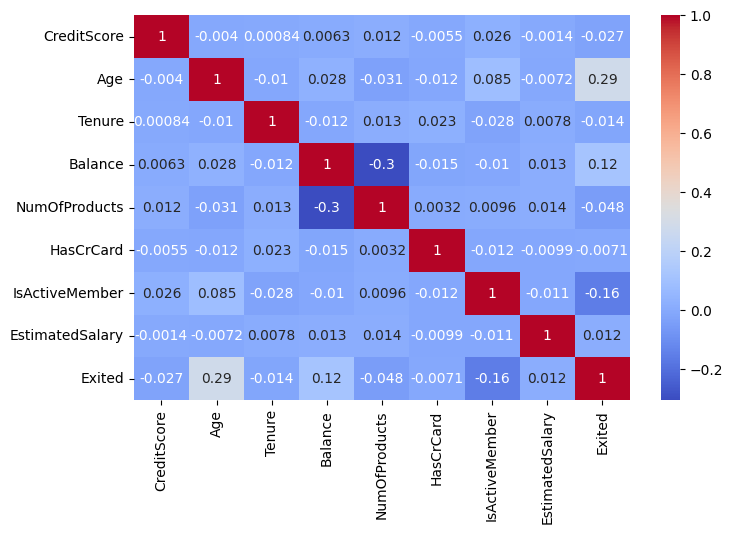

In [61]:
numeric=df.select_dtypes(include=['number'])
plt.figure(figsize=(8,5))
sns.heatmap(data=numeric.corr(),annot=True,cmap='coolwarm')
plt.show()

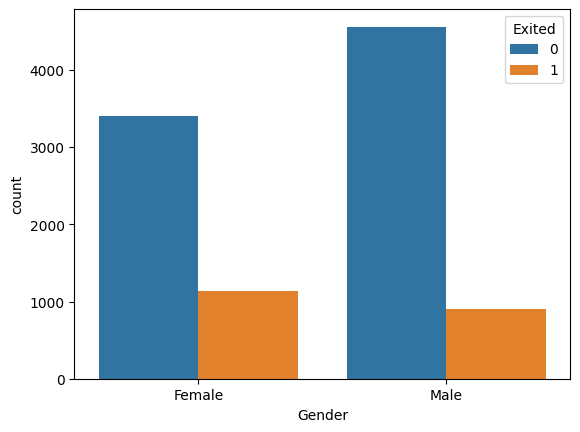

In [62]:
sns.countplot(x=df['Gender'],hue=df['Exited'])
plt.show()

In [63]:
def filterbyCountry(cntry):
  geo=df.groupby('Geography')
  country=geo.get_group(cntry)
  print("========================================================")
  print("Total Number of Customers in ",cntry,"= ",len(country))
  print("========================================================")

  print("Male-Female Ratio")
  count=country['Gender'].value_counts()
  plt.figure(figsize=(5,5))
  colors = ['#1f77b4', '#2ca02c']
  plt.pie(count.values,labels=['Male','Female'],autopct='%.1f%%',explode=[0,0.05],
          wedgeprops=dict(edgecolor='black'),colors=colors,startangle=90,shadow=True)
  plt.title(f"Gender Ratio of {cntry}")
  plt.legend()
  plt.show()
  print("\n=======================================================================\n")

  sns.displot(country['Age'], color =  '#FF5733', kde= True)
  plt.xlabel("Age")
  plt.ylabel("Frequency")
  plt.title(f"Age Distribution of {cntry}")
  plt.show()
  print("\n=======================================================================\n")

  # Create a violin plot
  plt.figure(figsize=(5,5))
  sns.violinplot(x='Gender', y='Age', data=country, palette='muted')
  plt.title(f"Age Distribution of {cntry}")
  plt.show()
  print("\n=======================================================================\n")

  plt.figure(figsize=(5,5))
  exited_cnt=country['Exited'].value_counts()
  labels=['Exited','Retained']
  colors = ['#1f77b4', '#2ca02c']
  explode=[0,0.05]
  plt.pie(exited_cnt.values,labels=labels,autopct='%.1f%%',explode=explode,
          wedgeprops=dict(edgecolor='black'),colors=colors,startangle=90,shadow=True)
  plt.title(f'Ratio of Retention in {cntry}')
  plt.legend()
  plt.show()

Total Number of Customers in  Spain =  2477
Male-Female Ratio


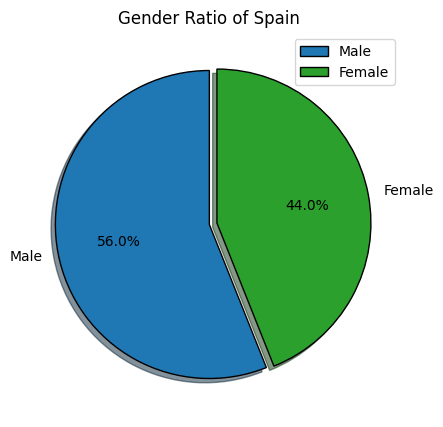

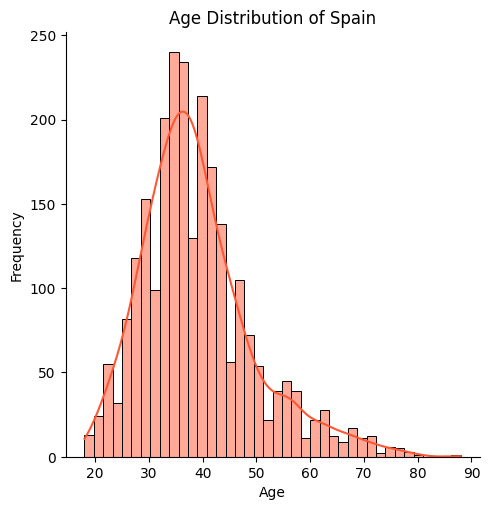

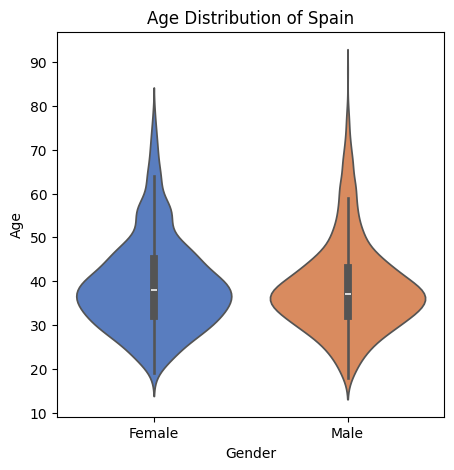

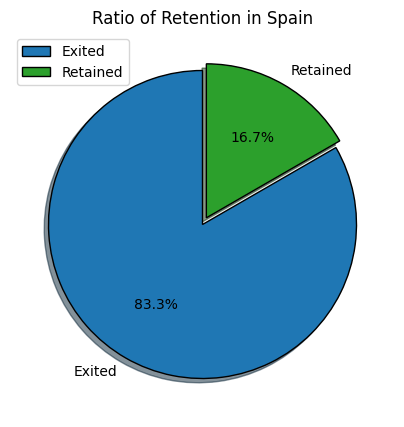

In [64]:
filterbyCountry('Spain')

Total Number of Customers in  France =  5014
Male-Female Ratio


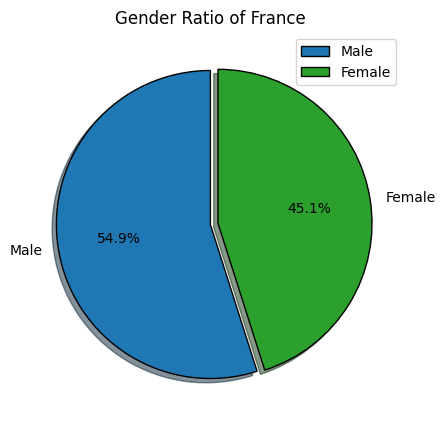

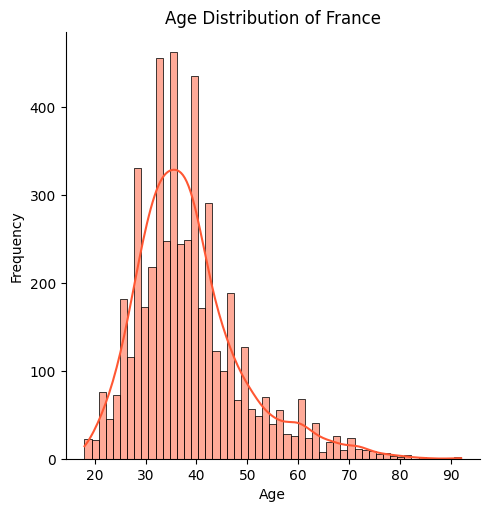

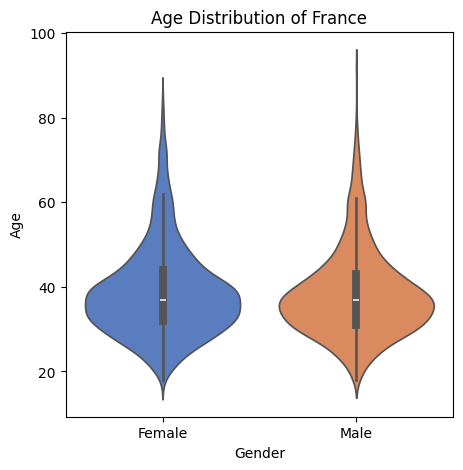

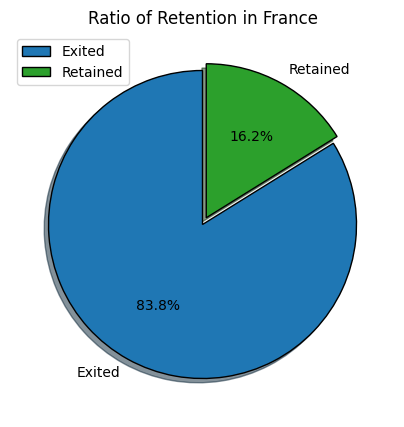

In [65]:
filterbyCountry('France')

Total Number of Customers in  Germany =  2509
Male-Female Ratio


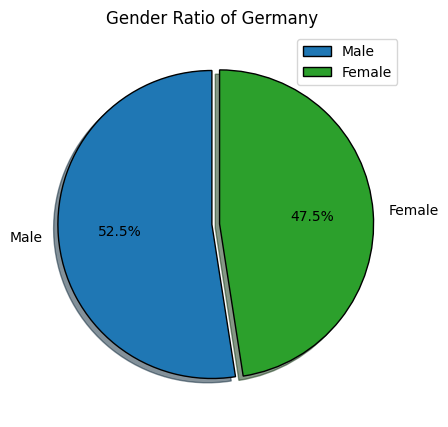

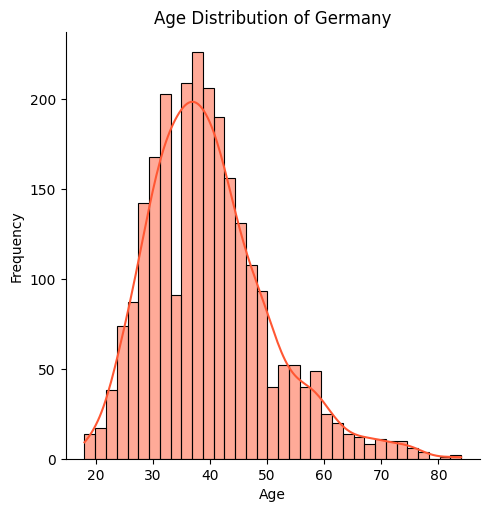

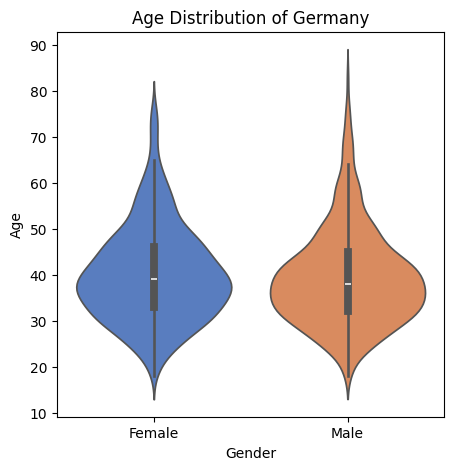

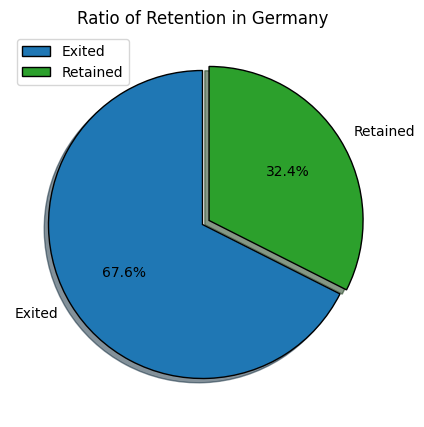

In [66]:
filterbyCountry('Germany')

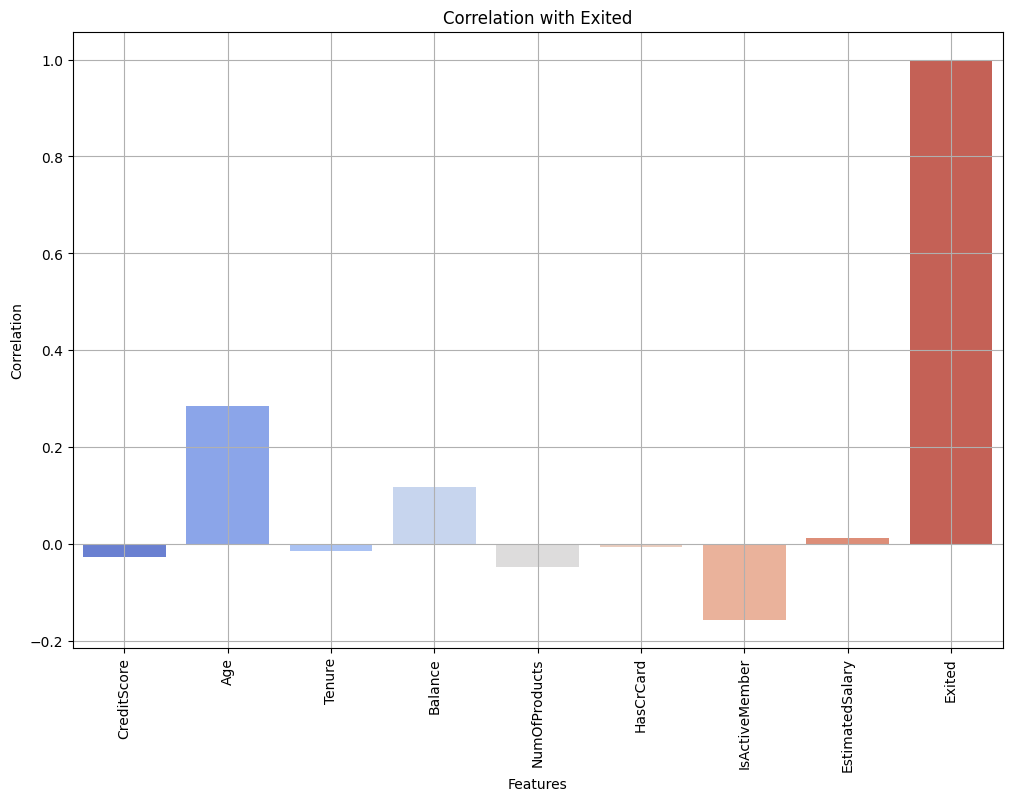

In [67]:
# Compute correlations
correlation = df.corrwith(df['Exited'], numeric_only=True)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x=correlation.index, y=correlation.values, palette='coolwarm')
plt.title('Correlation with Exited')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=90)
plt.grid()
plt.show()

## **LABEL ENCODING**

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [69]:
from sklearn.preprocessing import LabelEncoder

In [70]:
encoder=LabelEncoder()

In [71]:
df["Geography"]=encoder.fit_transform(df["Geography"])
print("Mapping for Geography\n")
for i, category in enumerate(encoder.classes_):
  print(f"{category} -> {i}")
df["Gender"]=encoder.fit_transform(df["Gender"])
print("======================================")
print("Mapping for Gender\n")
for i, category in enumerate(encoder.classes_):
  print(f"{category} -> {i}")

Mapping for Geography

France -> 0
Germany -> 1
Spain -> 2
Mapping for Gender

Female -> 0
Male -> 1


## **MODEL**

In [73]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score

In [74]:
x=df.drop('Exited',axis=1)
y=df['Exited']

In [78]:
scaler=StandardScaler()

In [79]:
x_scaled=scaler.fit_transform(x)

In [80]:
x_scaled

array([[-0.32622142, -0.90188624, -1.09598752, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-0.44003595,  1.51506738, -1.09598752, ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.53679418, -0.90188624, -1.09598752, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 0.60498839, -0.90188624, -1.09598752, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.25683526,  0.30659057,  0.91241915, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.46377078, -0.90188624, -1.09598752, ...,  0.64609167,
        -1.03067011, -1.07636976]])

In [81]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=7)

In [83]:
x_train.shape

(7500, 10)

In [86]:
y_train.shape

(7500,)

## LOGISTIC REGRESSION

In [88]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [89]:
lr.fit(x_train,y_train)

LogisticRegression()

In [91]:
y_pred_lr = lr.predict(x_test)

# Model Evaluation
print("Logistic Regression Model:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

Logistic Regression Model:
Accuracy: 0.8112

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      1990
           1       0.63      0.18      0.28       510

    accuracy                           0.81      2500
   macro avg       0.73      0.58      0.59      2500
weighted avg       0.78      0.81      0.77      2500

